In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from library.sb_utils import save_file

In [3]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [4]:
#import df
df = pd.read_csv('../data/df_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156608 entries, 0 to 156607
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        156608 non-null  int64  
 1   acousticness      156608 non-null  float64
 2   artists           156608 non-null  object 
 3   danceability      156608 non-null  float64
 4   duration_ms       156608 non-null  int64  
 5   energy            156608 non-null  float64
 6   explicit          156608 non-null  int64  
 7   instrumentalness  156608 non-null  float64
 8   key               156608 non-null  int64  
 9   liveness          156608 non-null  float64
 10  loudness          156608 non-null  float64
 11  mode              156608 non-null  int64  
 12  name              156608 non-null  object 
 13  popularity        156608 non-null  int64  
 14  speechiness       156608 non-null  float64
 15  tempo             156608 non-null  float64
 16  valence           15

In [5]:
#drop 1st column
df=df.drop(columns=['Unnamed: 0'])
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1921-30
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1921-30
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1921-30
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1921-30
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1921-30


In [6]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1921-30
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1921-30
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1921-30
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1921-30
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1921-30


In [7]:
X = df.drop(columns=['popularity', 'name', 'artists', 'decade'])
y = df.popularity

In [8]:
#split data into training/test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=47)




In [9]:
X_train.head()




,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
83415,0.000061,0.451,194227,0.815,0,0.000000,2,0.270,-5.550,0,0.0368,147.974,0.618,2004
104300,0.843000,0.326,162533,0.447,0,0.954000,0,0.582,-12.411,1,0.0364,166.632,0.673,1956
74155,0.000034,0.507,185667,0.802,0,0.000349,6,0.213,-6.800,1,0.0289,92.609,0.769,1998
144998,0.734000,0.491,181333,0.719,0,0.886000,9,0.140,-7.917,0,0.0482,97.513,0.512,1971
121467,0.701000,0.451,172507,0.623,0,0.000002,8,0.289,-8.848,1,0.0429,148.127,0.895,1962


In [10]:
#scale data
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [11]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dpred = dummy.predict(X_test)
dtrain=dummy.predict(X_train)
r2 = r2_score(y_train, dtrain), r2_score(y_test, dpred)

In [12]:
print(r2)

(0.0, -4.364047884397593e-06)


In [13]:
dummy = DummyRegressor()
dummy.fit(X_tr_scaled, y_train)
dpred = dummy.predict(X_te_scaled)
dtrain=dummy.predict(X_tr_scaled)
r2 = r2_score(y_train, dtrain), r2_score(y_test, dpred)

In [14]:
print(r2)

(0.0, -4.364047884397593e-06)


In [15]:
lr=LinearRegression()
lr.fit(X_tr_scaled, y_train)

LinearRegression()

In [16]:
y_tr_pred = lr.predict(X_tr_scaled)
y_te_pred = lr.predict(X_te_scaled)

In [17]:
#assess model performance
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.7942658355781474, 0.794153686678039)

In [18]:
#Refining the Linear Model
pipe = make_pipeline(SimpleImputer(strategy= 'median'),
                    StandardScaler(),
                    LinearRegression())

In [19]:
#fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [21]:
#Assessing using cross-validation
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [22]:
cv_scores = cv_results['test_score']
cv_scores

array([0.79525215, 0.7976227 , 0.78999733, 0.79841225, 0.7896497 ])

In [23]:
np.mean(cv_scores), np.std(cv_scores)

(0.7941868285104455, 0.0037129964473219617)

In [24]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7942658355781474, 0.794153686678039)

In [25]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'standardscaler': [StandardScaler(), None, MinMaxScaler()]}

In [26]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [27]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'standardscaler': [StandardScaler(), None,
                                            MinMaxScaler()]})

In [28]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
print(score_mean, score_std)

[0.79418683 0.79418683 0.79418683] [0.003713 0.003713 0.003713]


In [29]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'standardscaler': None}

In [30]:
dt_pipe = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=47))

In [31]:
dt_cv_results = cross_validate(dt_pipe, X_train, y_train, cv=5)

In [32]:
print(np.mean(dt_cv_results['test_score']))

0.6564754521683808


In [33]:
rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47))

In [34]:
rf_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)

In [35]:
print(rf_cv_results)

{'fit_time': array([81.81064892, 80.28100991, 78.45440531, 79.19648314, 84.44942284]), 'score_time': array([0.70754981, 0.69392991, 0.70523787, 0.71079612, 0.73440003]), 'test_score': array([0.83342304, 0.83640286, 0.82992847, 0.83628617, 0.82854299])}


In [36]:
rf_cv_scores = rf_cv_results['test_score']



In [37]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8329167054950066, 0.003219373365826157)

In [38]:
n_est = [int(n) for n in range(100,200,5)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195],
 'standardscaler': [StandardScaler(), None]}

In [39]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [40]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [100, 105, 110,
                                                                 115, 120, 125,
                                                                 130, 135, 140,
                                                                 145, 150, 155,
                                                                 160, 165, 170,
                                                                 175, 180, 185,
                                                                 190, 195],
                         'standardscaler': [StandardScaler(), None]})

In [41]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 195,
 'standardscaler': StandardScaler()}

In [42]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.83446681, 0.83723817, 0.83083161, 0.83729028, 0.82967086])

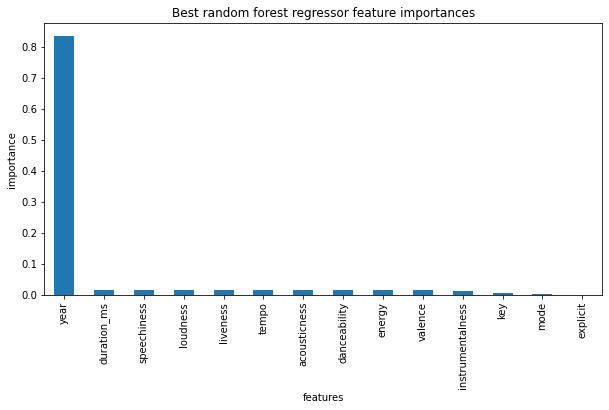

In [43]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [50]:
best_model = lr_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [51]:
modelpath = '../models'
save_file(best_model, 'spotify_popularity_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models/spotify_popularity_model.pkl"
